In [1]:
#Check Lib Version
import sys
print('Pyhton: {}'. format(sys.version))
import scipy
print('SciPy: {}'. format(scipy.__version__))
import numpy
print('NumPy: {}'. format(numpy.__version__))
import matplotlib
print('Matplotlib: {}'. format(matplotlib.__version__))
import pandas
print('Pandas: {}'. format(pandas.__version__))
import sklearn
print('Sklearn: {}'. format(sklearn.__version__))
import seaborn
print('Seaborn: {}'. format(seaborn.__version__))

Pyhton: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]
SciPy: 1.13.1
NumPy: 1.26.4
Matplotlib: 3.9.2
Pandas: 2.2.2
Sklearn: 1.5.1
Seaborn: 0.13.2


In [2]:
#Load Libraries
import sys
import scipy as sy
import numpy ny
import matplotlib
import pandas as pd
import sklearn as sk
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [35]:
url = "https://archive.ics.uci.edu/static/public/53/data.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pd.read_csv(url, names=names)

In [36]:
print(df.shape)

(151, 5)


In [39]:
print(df.head(10))

   sepal-length  sepal-width  petal-length  petal-width        class
0  sepal length  sepal width  petal length  petal width        class
1           5.1          3.5           1.4          0.2  Iris-setosa
2           4.9            3           1.4          0.2  Iris-setosa
3           4.7          3.2           1.3          0.2  Iris-setosa
4           4.6          3.1           1.5          0.2  Iris-setosa
5             5          3.6           1.4          0.2  Iris-setosa
6           5.4          3.9           1.7          0.4  Iris-setosa
7           4.6          3.4           1.4          0.3  Iris-setosa
8             5          3.4           1.5          0.2  Iris-setosa
9           4.4          2.9           1.4          0.2  Iris-setosa


In [42]:
print(df.describe())

       sepal-length sepal-width petal-length petal-width        class
count           151         151          151         151          151
unique           36          24           44          23            4
top               5           3          1.5         0.2  Iris-setosa
freq             10          26           14          28           50


In [7]:
print(dataset.groupby('class').size()))

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
class               1
dtype: int64


     sepal-length  sepal-width  petal-length  petal-width           class
0    sepal length  sepal width  petal length  petal width           class
1             5.1          3.5           1.4          0.2     Iris-setosa
2             4.9            3           1.4          0.2     Iris-setosa
3             4.7          3.2           1.3          0.2     Iris-setosa
4             4.6          3.1           1.5          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.3           5.7          2.5  Iris-virginica
146           6.7            3           5.2          2.3  Iris-virginica
147           6.3          2.5             5          1.9  Iris-virginica
148           6.5            3           5.2            2  Iris-virginica
149           6.2          3.4           5.4          2.3  Iris-virginica

[150 rows x 5 columns]


ValueError: boxplot method requires numerical columns, nothing to plot.

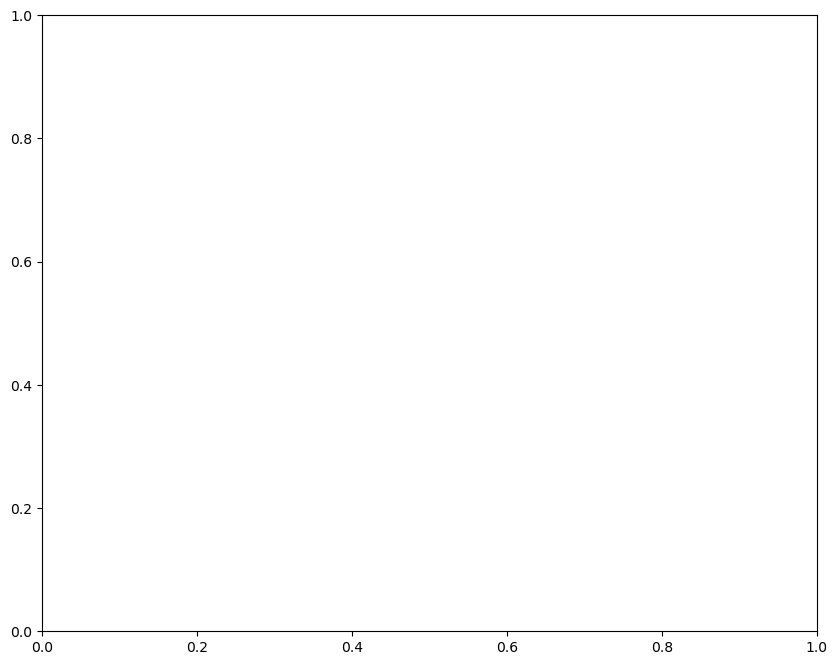

In [58]:
# Create subplots for each column
  # Excluding the 'class'
df = dataset[:-1]
print(df)
df.boxplot(subplots=True, sharex=False, sharey=False, figsize=(10, 8))
#sns.boxplot(data=dataset.iloc[:, :-1])
plt.tight_layout()
plt.show()


In [49]:
array=df.values
#print(array)
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 6
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = seed)

In [52]:
seed = 6
scoring = 'accuracy'

In [56]:
#Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
#Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.958333 (0.041667)
LDA: 0.958333 (0.041667)
KNN: 0.950000 (0.055277)
CART: 0.941667 (0.053359)
NB: 0.966667 (0.040825)
SVM: 0.958333 (0.055902)


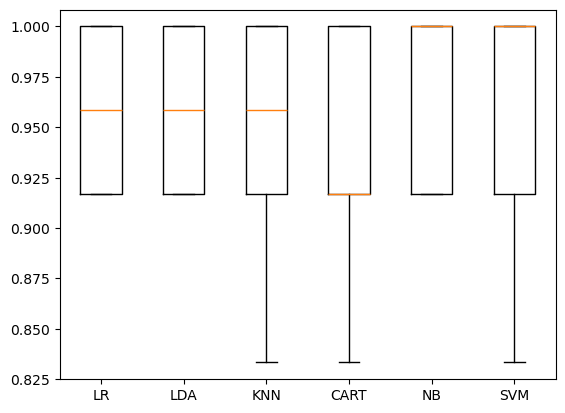

In [57]:
#Compare Algorithms
fig = plt.figure()
fig.suptitle = ('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
